## EDA, Pre processing and Visualization of Zomato Bangalore Restaurants Dataset

In [1]:
# Loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [2]:
# Loading the dataset

df = pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Exploratory Data Analysis (EDA) to understand the dataset

In [3]:
df.shape

(51717, 17)

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

## Pre processing

Drop unnecessary columns

In [5]:
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list', 'listed_in(city)' ], axis= 1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


Check and drop duplicates

In [7]:
df.duplicated().sum()

16706

In [8]:
# there is 16706 duplicated rows

df = df.drop_duplicates()
df.shape

(35011, 10)

Rate column

In [9]:
df['rate'].value_counts(dropna=False)

NaN       3770
3.9/5     1514
3.7/5     1376
3.8/5     1371
3.9 /5    1353
          ... 
2.0 /5       6
2.0/5        4
2.2 /5       3
1.8/5        1
1.8 /5       1
Name: rate, Length: 65, dtype: int64

In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Replace 'NEW' and '-' values as nan and remove '/5' from column values and transform the column in to float datetype

In [11]:
df['rate'].isnull().sum()

3770

In [12]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
# Replace 'NEW', '-' as Nan

df['rate'] = df['rate'].apply(lambda x: x if x not in ['NEW', '-'] else np.nan)
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
# Remove '/5' from Rate Column

df['rate'] = [float(str(value).split('/')[0]) for value in df['rate']]
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

Mean of Rate column

In [15]:
df['rate'].mean()

3.730490740121682

Rename long column names

In [16]:
df = df.rename(columns = {'approx_cost(for two people)': 'CostForTwo', 'listed_in(type)':'Type'})
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,CostForTwo,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [17]:
df['CostForTwo'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

Remove commas from the values and change to float datatype

In [18]:
df['CostForTwo'] = [float(str(value).replace(',','')) for value in df['CostForTwo']]
df['CostForTwo'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

rest_type column

In [19]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [20]:
df['rest_type'].value_counts()

Quick Bites                   12179
Casual Dining                  7573
Cafe                           2606
Delivery                       1520
Dessert Parlor                 1504
                              ...  
Bakery, Sweet Shop                1
Mess, Quick Bites                 1
Quick Bites, Kiosk                1
Dessert Parlor, Food Court        1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

Group 'minor' values as 'others'

In [21]:
rest_types = df['rest_type'].value_counts(ascending=False)
rest_types

Quick Bites                   12179
Casual Dining                  7573
Cafe                           2606
Delivery                       1520
Dessert Parlor                 1504
                              ...  
Bakery, Sweet Shop                1
Mess, Quick Bites                 1
Quick Bites, Kiosk                1
Dessert Parlor, Food Court        1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [22]:
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

Casual Dining, Bar            961
Bakery                        736
Beverage Shop                 488
Bar                           481
Food Court                    427
                             ... 
Bakery, Sweet Shop              1
Mess, Quick Bites               1
Quick Bites, Kiosk              1
Dessert Parlor, Food Court      1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 87, dtype: int64

In [23]:
# making these less than 1000 values as 'others'

df['rest_type'] = df['rest_type'].apply(lambda x: x if x not in rest_types_lessthan1000 else 'others')
df['rest_type'].value_counts()

Quick Bites           12179
others                 8246
Casual Dining          7573
Cafe                   2606
Delivery               1520
Dessert Parlor         1504
Takeaway, Delivery     1227
Name: rest_type, dtype: int64

location column

In [24]:
df['location'].value_counts()

BTM                     2514
Whitefield              1972
Indiranagar             1789
HSR                     1769
Marathahalli            1683
                        ... 
Central Bangalore          5
Nagarbhavi                 4
Rajarajeshwari Nagar       2
Jakkur                     1
Peenya                     1
Name: location, Length: 93, dtype: int64

In [25]:
# Group as 'others' if value count is less than 300

location = df['location'].value_counts(ascending=False)

location_lessthan300 = location[location<300]
location_lessthan300

Cunningham Road                  287
Jeevan Bhima Nagar               262
Shanti Nagar                     258
St. Marks Road                   244
Vasanth Nagar                    182
Bommanahalli                     181
Basaveshwara Nagar               177
Thippasandra                     176
Shivajinagar                     167
Commercial Street                164
Ejipura                          160
Koramangala 8th Block            155
Kumaraswamy Layout               134
Koramangala 3rd Block            129
Wilson Garden                    128
Majestic                         119
Nagawara                         117
Seshadripuram                    115
Hennur                           107
Varthur Main Road, Whitefield    104
ITPL Main Road, Whitefield       102
HBR Layout                       100
Yeshwantpur                       95
Race Course Road                  94
City Market                       85
Infantry Road                     84
Kaggadasapura                     81
C

In [26]:
df['location'] = df['location'].apply(lambda x: x if x not in location_lessthan300 else 'others')
df['location'].value_counts()

others                   4885
BTM                      2514
Whitefield               1972
Indiranagar              1789
HSR                      1769
Marathahalli             1683
Koramangala 5th Block    1615
JP Nagar                 1411
Jayanagar                1248
Electronic City          1222
Bellandur                1134
Bannerghatta Road        1060
Sarjapur Road             947
Brigade Road              687
Koramangala 7th Block     626
Brookefield               600
Koramangala 6th Block     599
Kalyan Nagar              594
Koramangala 4th Block     587
New BEL Road              586
Banashankari              573
MG Road                   566
Malleshwaram              557
Ulsoor                    547
Koramangala 1st Block     540
Frazer Town               475
Basavanagudi              463
Rajajinagar               462
Church Street             446
Banaswadi                 442
Residency Road            424
Kammanahalli              423
Old Airport Road          407
Lavelle Ro

cuisines column

In [27]:
cuisines = df['cuisines'].value_counts()

In [28]:
cuisines_lessthan100 = cuisines[cuisines<100]

df['cuisines'] = df['cuisines'].apply(lambda x: x if x not in cuisines_lessthan100 else 'others')
df['cuisines'].value_counts()

others                                              19782
North Indian                                         1928
North Indian, Chinese                                1585
South Indian                                         1175
Bakery, Desserts                                      597
Biryani                                               563
Fast Food                                             490
South Indian, North Indian, Chinese                   477
Cafe                                                  466
Desserts                                              451
Bakery                                                387
Chinese                                               338
Ice Cream, Desserts                                   305
Mithai, Street Food                                   260
Chinese, North Indian                                 253
North Indian, Chinese, Biryani                        240
North Indian, South Indian                            233
Desserts, Ice 

## Data Visualization

Number of restaurants by location

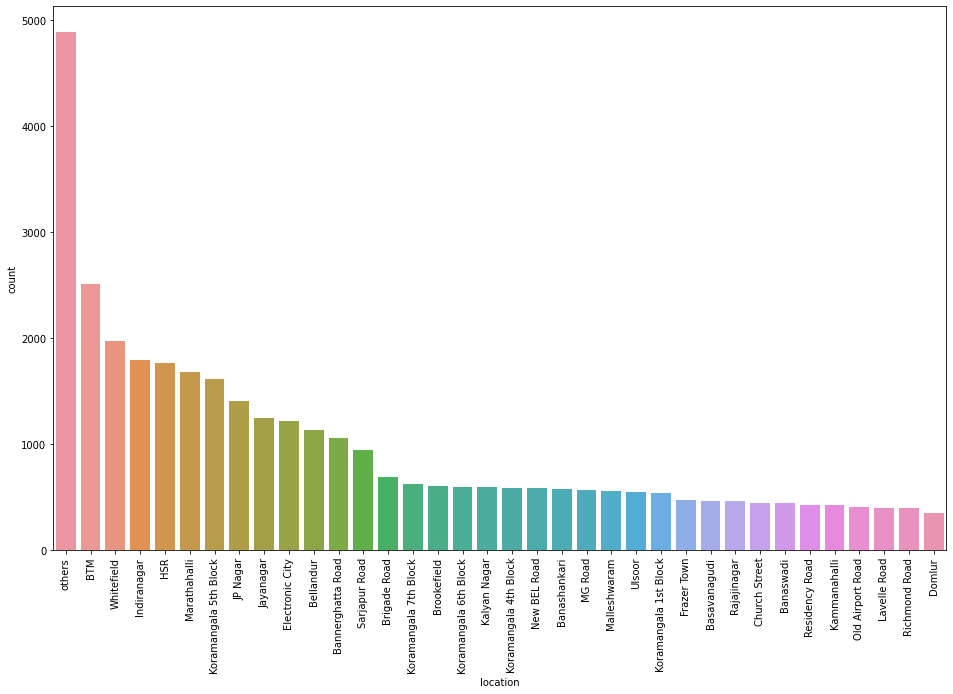

In [29]:
order_by_size = df.groupby('location').size().sort_values().index[::-1] # [::-1] reverses the ascending order

plt.figure(figsize=(16,10))
sns.countplot(df['location'], order = order_by_size)
plt.xticks(rotation=90)   # rotates x-label so it becomes readable
plt.show()

Online order - availability

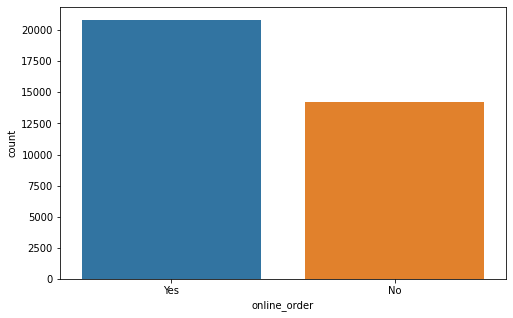

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(df['online_order'])
plt.show()

Online order - availability vs rate

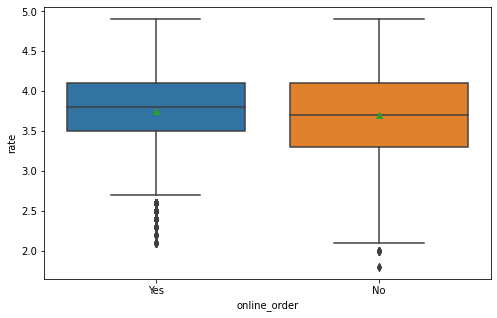

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x = 'online_order', y='rate', data=df, showmeans=True)
plt.show()

Book Table - availability

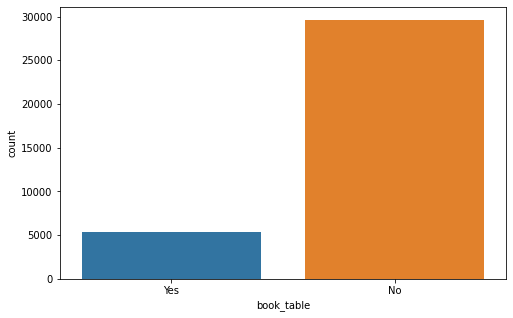

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(df['book_table'])
plt.show()

Book table - availability vs rate

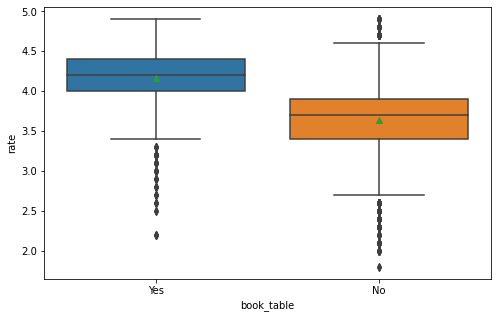

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(x = 'book_table', y='rate', data=df, showmeans=True)
plt.show()

Online order availability by location

In [34]:
online_order_by_location = df.groupby(['location', 'online_order']).size().unstack('online_order', fill_value=0)
online_order_by_location

online_order,No,Yes
location,,
BTM,815,1699
Banashankari,260,313
Banaswadi,223,219
Bannerghatta Road,407,653
Basavanagudi,182,281
Bellandur,443,691
Brigade Road,293,394
Brookefield,208,392
Church Street,182,264


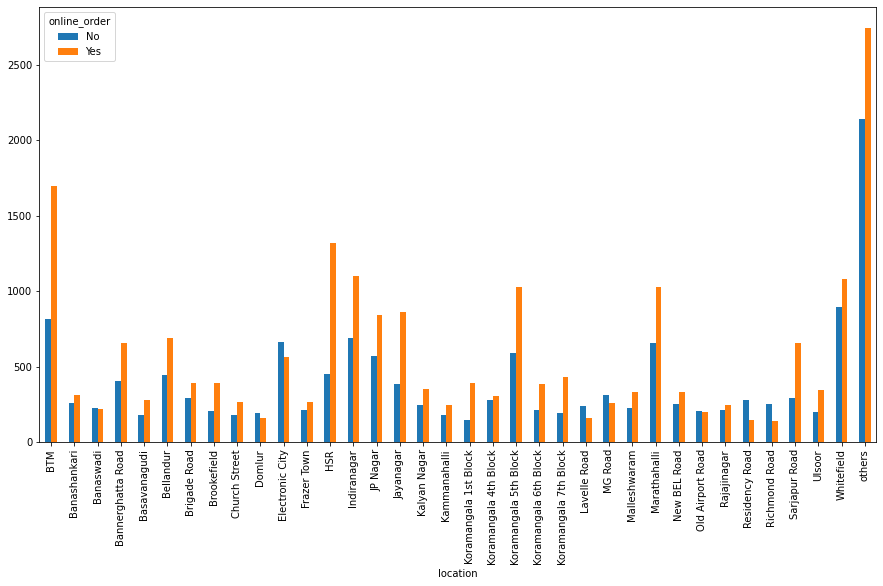

In [35]:
online_order_by_location.plot(kind='bar', figsize=(15, 8))
plt.show()

Book Table availability by location

In [36]:
book_table_by_location = df.groupby(['location', 'book_table']).size().unstack('book_table', fill_value=0)
book_table_by_location

book_table,No,Yes
location,,
BTM,2388,126
Banashankari,530,43
Banaswadi,436,6
Bannerghatta Road,981,79
Basavanagudi,451,12
Bellandur,1038,96
Brigade Road,541,146
Brookefield,527,73
Church Street,279,167


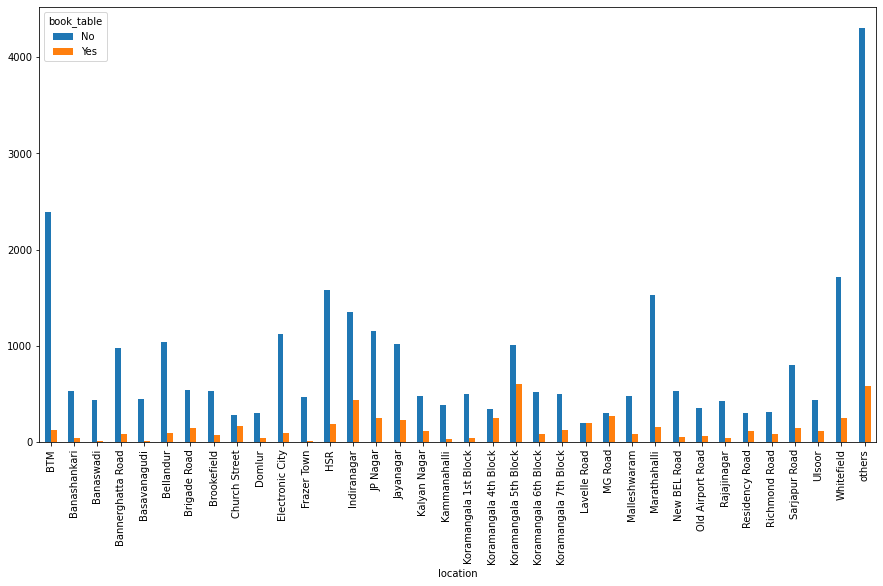

In [37]:
book_table_by_location.plot(kind='bar', figsize=(15, 8))
plt.show()

Restaurant type by rate

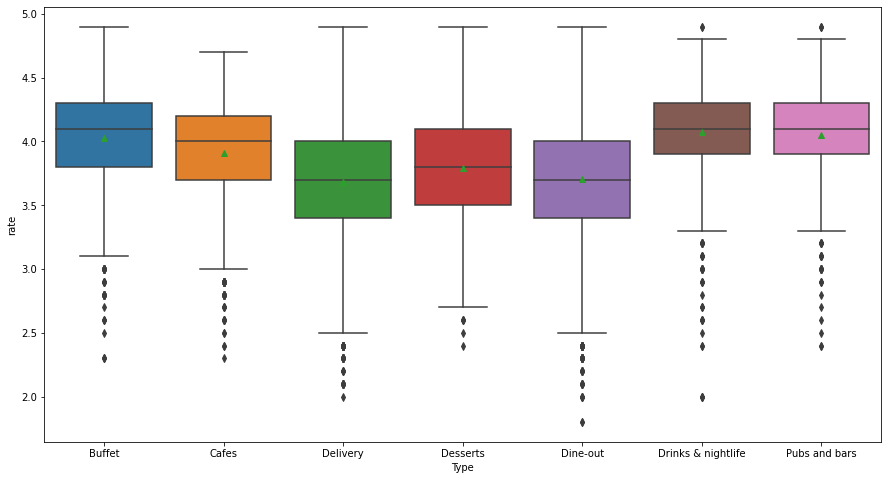

In [38]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Type', y='rate', data=df, showmeans=True)
plt.show()

Restaurant types by location

In [39]:
type_by_location = df.groupby(['location', 'Type']).size().unstack('Type', fill_value=0)
type_by_location

Type,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
location,,,,,,,
BTM,17,46,1434,112,876,15,14
Banashankari,5,24,244,46,247,7,0
Banaswadi,0,13,164,19,241,4,1
Bannerghatta Road,8,27,515,92,407,9,2
Basavanagudi,4,8,195,45,208,3,0
Bellandur,28,34,519,72,448,17,16
Brigade Road,13,24,249,55,273,51,22
Brookefield,6,17,300,42,231,4,0
Church Street,19,44,138,21,172,31,21


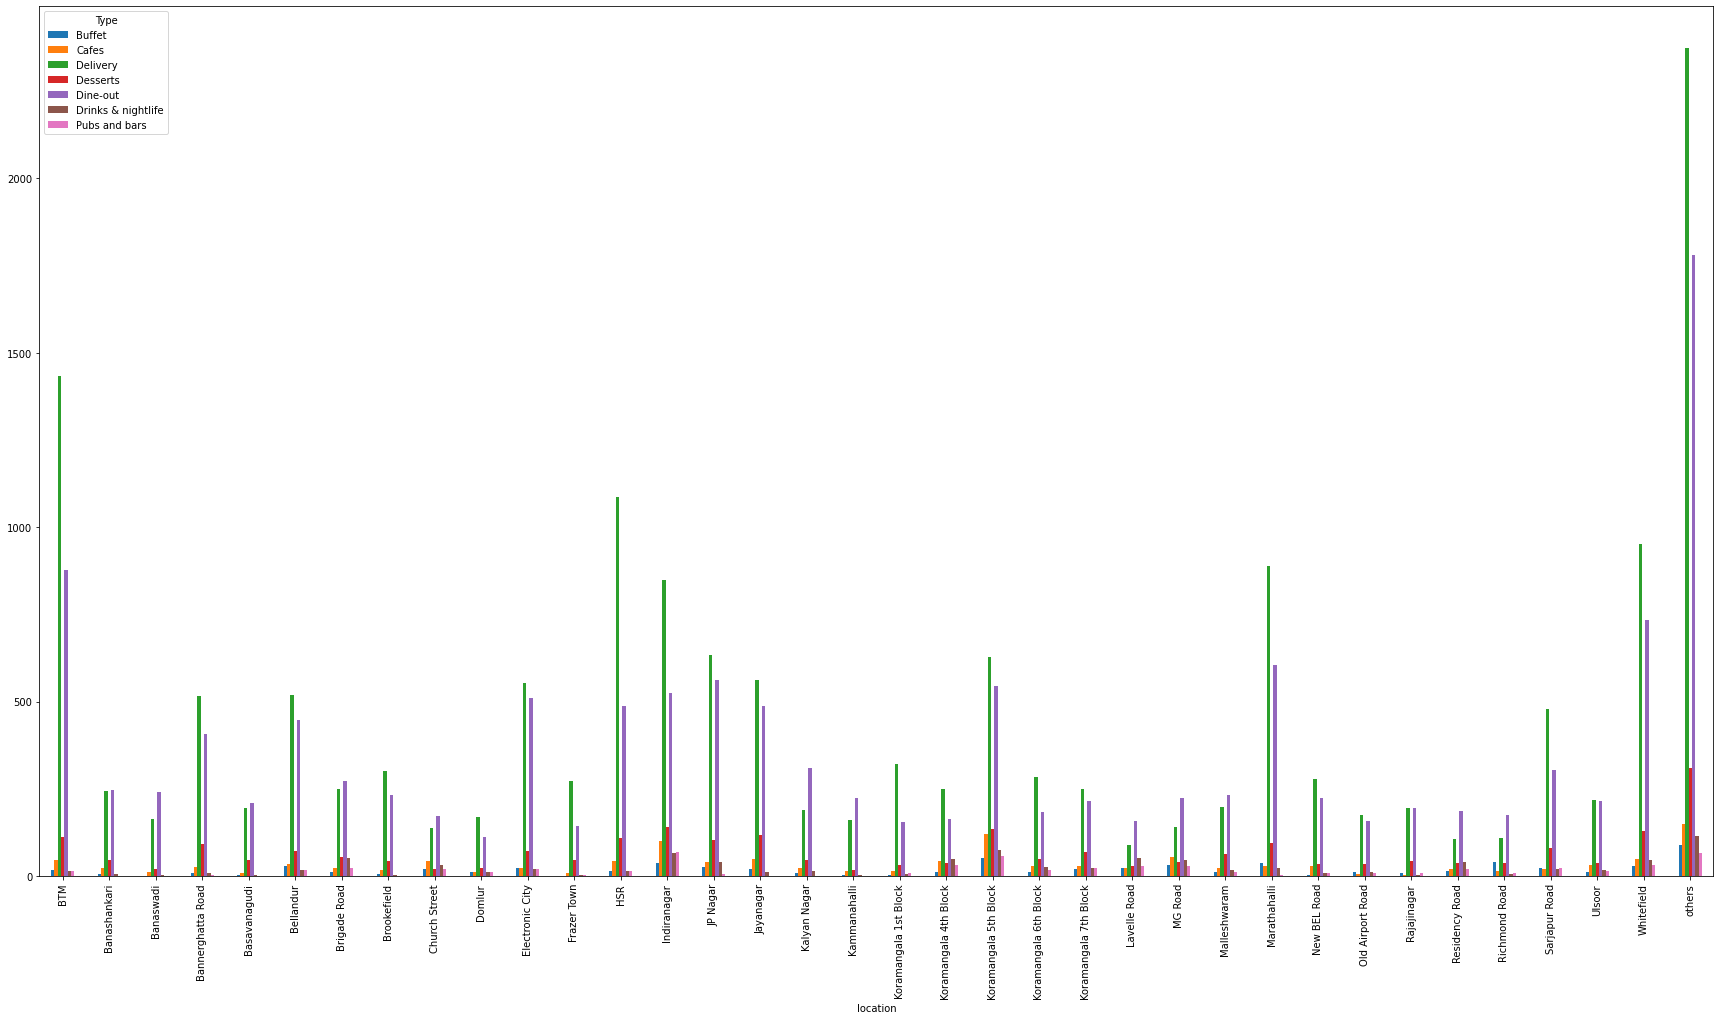

In [40]:
type_by_location.plot(kind='bar', figsize=(30, 16))
plt.show()